## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Background / Motivation

American Express (AmEx) is one of the most influential payment card corporations in the world and owning an AmEx card is a financial status symbol that many people aim for. However, it is extremely hard to get approved for an AmEx card as AmEx, like other financial institutions, has a strong interest in assessing and managing credit risk. By analyzing risk factors associated with each individual, they aim to make informed decisions about extending credit and managing potential defaults. This will allow them to mitigate loss and maximize profit, stay compliant to regulations, and optimize lending decisions. Particularly, they would like to identify potential credit defaulters to steer away from those customers. On the customer side, we all want to own an AmEx card ourselves so our model would allow customers to measure and improve their success probability before applying for an AmEx credit card.  

## Problem statement

The question we aim to answer through this project is "How likely is a given American Express customer to default on their credit?" Our goal is to answer this question while also maximizing accuracy and recall to ensure that our final model would actually be of use to American Express. Considering the models we have experience with, we believe we can achieve an accuracy and recall of at least 70%, and our goal is to surpass this benchmark for both our accuracy and recall. 

## Data sources
The dataset used was borrowed from an American Express Kaggle competition and can be found at the following link: https://www.kaggle.com/competitions/amex-default-prediction/overview. It contains 924,621 observations of credit default events along with anonymized customer profile information. A credit default event is defined as a customer not paying back their credit card balance in 120 days after their latest statement date. Customer profile information contained features related to delinquency, spend, payment, balance, and risk for each statement date making up a total of 190  predictors. 

## Stakeholders 

Our two key stakeholders are American Express and people who want to be approved for an American Express credit card. As was mentioned above, American Express would care about the success of our models because these could be useful to them when deciding who to approve for a credit card. For example, they could use our models on a potential card holder and determine whether to approve them for the credit card based on if the model classifies the customer as likely to default on their credit or not likely to default on their credit. Meanwhile, customers benefit from our models because there is an objective system behind the decision to approve them for a credit card. If they access our models, they will see which factors are most relevant in the decision to approve them, and they can control what they do to make themselves better candidates for approval by American Express standards.

## Data quality check / cleaning / preparation 

Data were first randomly subsetted from the original large dataset to obtain 10,000 observations for each train and test data in order produce a more computationally manageable dataset. After evaluating the dataset for missing values, 27 were found to have greater than 80% missing values. Given the relatively small scale of this subset of predictors, they were dropped from future analysis. KNN was used to impute the remaining missing values on both train and test data after finding the optimal k to be 1. Notably, there were no missing values in the response variable. All categorical variables were converted to dummy variables. Both the clean train and test datasets (prior to dropping the target column) consisted of 10,000 observations and 164 columns.

The response had 25.53% 1s (default) and 74.47% 0s (no default). 

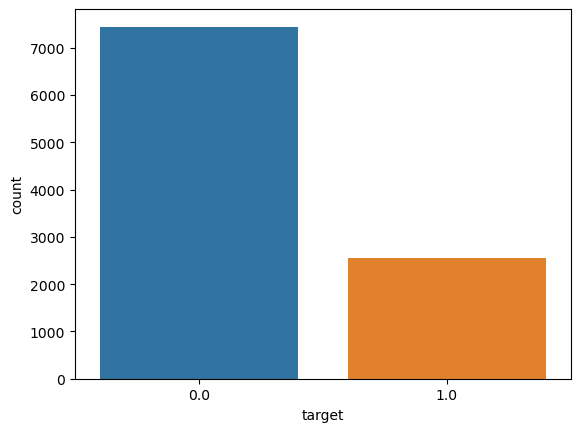

The distribution of categorical variables is present in the Appendix. Given the large number of continuous variables, the distribution of select variables in provided in tabular form in the Appendix. No useful insights were obtained from the data quality check.

## Exploratory data analysis

The relationship of categorical variables with the response was plotted (see Appendix) and the distribution of 0s and 1s did not show any identifiable pattern, suggesting that each feature gives some information about the target. Overall, EDA did not produce significant insights for model development. 

## Approach

We used a variety of different models like Logistic Regression, Tree models (Decision Tree, Bagging, Random Forest), Boosting models (Gradient boost, Ada Boost, XG boost), Lasso and Ridge Models, as well as Forward and Backward Selection. Our approach consisted of first exploring the performance of logistic regression models, backward and forward selection, lasso and ridge. Then we explored how our model preformed with tree based models and boosting models, and finally looked at ensembling the best performing models and the most different to one another we had tried during our process. 

Our main goal was to optimize both accuracy and recall in our model. Accuracy was crucial to ensure the correct identification of the class for each response. Additionally, recall was significant in order to minimize the false negative rate (FNR). Basically, it may be worse to classify a default (y = 1) as not a default (y = 0), as opposed to the case where the person did not default (y = 0) and is classified as default (y = 1).  To ensure financial preparedness for potential defaults, the bank finds it advantageous to overbudget expenses, even if it means encountering more false positives. This approach is preferable to being financially underprepared.

Some problems we encountered was that our dataset had lots of observations which was taking up too much power for our computers and taking too long on Colab, so we decided to take a random sample of the data. Adding on, we did not anticipate that our more basic models such as the logistic regression one would preform relatively well and sometimes even better than our boosting models. 

Since our dataset came from a Kaggle Competition Dataset people had already tried to create models for the data but there were not any notebooks that showed code on what people did as the successful solutions were likely to be used by Amex and are confidential. There were a few comments in the discussion section where people discussed what they did for certain areas like cross-validation and imputing missing values however we did not know how successful these were so we decided to basically try all the methods we had learn throughout the year and start the model creation from scratch. Some EDA was published on Kaggle but we did not end up using any of it.  

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Baseline Model 
*By Luna Nguyen*

We scale our data for all the models developed in this project. Therefore, the baseline model is an untuned logistic regression based on scaled data. No hyperparameter was tuned for the model, including the decision threhold. The model's `accuracy = 86.14` and `recall = 71.64`. These metrics are not bad but with other models and additional tuning of the decision threshold, we can bring these metrics up even higher. 

### Logistic Regression Model 
*By Luna Nguyen*

Starting with the baseline model, I decided to try to tune the C value to observe any improvement on the model's recall or accuracy. By doing a `GridSearchCV` with C values in the `range 10**np.linspace(-10, 10)`, `C = 0.014563484775012445` performs the best. The range was intentionally kept wide to ensure that the optimal C was captured. Then, I developed the model `tree = LogisticRegression(random_state=1, C = 0.014563484775012445)`. I then further tune its decision threshold to the threshold where recall and accuracy are roughly the same, which ends up being `threshold = 0.231`. This model recall is significantly improved compared to the baseline model (from 71.64% to 86.31%) without compromising too much of the accuracy (from 86.14% to 85.43%). Overall, this is one of our best model. One reason why the logistic regression model performs so well can be that the log(odds) of the response have a linear relationship with the predictors. 

### Polynomial Features with Logistic Regression
*By Luna Nguyen*

Since I couldn't do a MARS model for a classificaiton problem, I decided to try polynomial features with logistic regression. I did a for-loop search through `degree either 1 or 2` and C values in the `range 10**np.linspace(-5,5)` and I got `degree = 1` and `C = 0.018420699693267165` for my optimal values. I have tried to search through a wider range, but it ended up being too computationally expensive. Then, I transformed my predictors using `new_predictors = PolynomialFeatures(1).fit_transform(X_train)` and use this transformed predictors in my model `LogisticRegression(solver = 'newton-cg', C = 0.018420699693267165, max_iter = 1000).fit(new_predictors, y_train)`. I thne further tune its decision treshold to the threshold where recall and accuracy are roughly the same, which ends up being `threshold = 0.227`. This model gives me `recall = 86.38%` and `accuracy = 85.28%` which is just as good as the logistic regression. This makes sense because PolynomialFeatures degree = 1 is just like a normal logistic regression. 

### Decision Tree Model 
*By Luna Nguyen*

I first created an baseline decision tree model `DecisionTreeClassifier(random_state = 1).fit(X_train, y_train)` to find the maximum depth and leaves that this tree can have and also compute all the alpha values for the Minimal Cost-Complexity Pruning path. As a result, the baseline decision tree is `26 levels` deep and has `339 leaves` and there are `232 possible alpha values`. Using all of these information, I did the following coarse grid search with a `max_features range of 163`, which is the total number of predictors. It is worth noting that `RandomizedGridSearch` with `n_iter = 1000` was used to reduce computation cost. 

`param_grid = {'max_depth': range(2, 26), 'max_leaf_nodes': range(0, 339),'max_features': range(1, 163), 'ccp_alpha':alphas}`

This coarse grid search gives me the following combination as the optimal combination: `{'max_leaf_nodes': 132, 'max_features': 144, 'max_depth': 3, 'ccp_alpha': 0.0006011115616725905}`.

I also did a finer grid search using a much narrower range for each hyperparameter, using the optimal value of from the previous grid search as the center. This time, I also use `RandomizedGridSearch`, but I use `n_iter = 2000` with the intention of search within a smaller range using more samples, with the hope of capturing the optimal combination while still mitigate compution cost.  

`param_grid = {'max_depth': range(2, 10), 'max_leaf_nodes': range(125, 140), 'max_features': range(140, 150), 'ccp_alpha':alphas}`

This fine grid search give me the following combination as the optimal combination: `{'max_leaf_nodes': 139, 'max_features': 148, 'max_depth': 8, 'ccp_alpha': 0.004313741792369128}`. I further tune the decision threshold for one where the accuracy and recall are roughly the same. This threshold turns out to be `0.231`. 

These hyperparameters and decision threshold produces a model with a good accuracy at 83.24% and a good recall at 81.32%. Even though these metrics are good, they are not as good as our logistic regression model.

### AdaBoost 
*By Hoda Fakhari*

First, an AdaBoost model with default parameter values was built, which produced an accuracy of 83.38% and a recall of 0.8237 on test data after finding the optimal decision threshold of 0.49. Then a coarse grid search was conducted using  `RandomizedSearchCV` with 5-fold cross validation and the following hyperparameter values: 
`grid['n_estimators'] = [10, 50, 100,200,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4)]`

Optimal hyperparameters were found to be `{'n_estimators': 500, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3)}`. This AdaBoost model had a test accuracy and recall of 81.73% and 0.8455, respectively, after tuning the optimal decision threshold probability of 0.4618. 

The range of hyperparameter values used in the first coarse grid search were plotted against 10-fold cross-validated accuracy to help determine the appropriate ranges for the subsequent search. Then, a second grid search with RandomizedSearchCV and 2-fold cross-validation was conducted using the following hyperparameter values: 
`grid['n_estimators'] = [550,600,650]
grid['learning_rate'] = [0.15, 0.2, 0.25]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=3)]`. 

Optimal hyperparameters were found to be `{'n_estimators': 600, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3)}`. The next AdaBoost model trained on these values had test accuracy of 78.26 and a test recall of 0.8878 using an optimal decision threshold of 0.4578. 

In an attempt to improve the accuracy-recall balance, a third grid search using RandomizedSearchCV and 2-fold cross-validation with the following hyperparameters was conducted: 
`grid['n_estimators'] = [550,600,650]
grid['learning_rate'] = [0.15, 0.2, 0.25, 0.3]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4)]`. The optimal hyperparemters (`{n_estimators:600, 'base_estimator': DecisionTreeClassifier(max_depth=4), 'learning_rate': 0.25}`) were used to fit the next AdaBoost model. 

A final round of tuning was conducted using GridSearchCV and 2-fold cross-validation with the following hyperparameters: 
`grid['n_estimators'] = [550,600,650]
grid['learning_rate'] = [0.15, 0.2, 0.25, 0.3]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4)]`. The optimal hyperparameters `({'n_estimators': 600, 'base_estimator': DecisionTreeClassifier(max_depth=4), 'learning_rate': 0.25})` were used to fit the final AdaBoost  which produced a test accuracy and recall of 84.11% and 0.8624 using an optimal decision threshold of 0.4250, which were an improvement to the default model. 
                       

### Gradient Boosting
*By Hoda Fakhari*

A Gradient Boosting model with default parameters was made, which produced a test accuracy of 85.61% and test recall of 0.8244 using an optimal decision threshold of 0.2797. The first coarse grid search was conducted using RandomizedSearchCV with 3-fold cross-validation and the following hyperparameters: 
`grid['n_estimators'] = [100,300,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['max_depth'] = [2,4,8]
grid['subsample'] = [0.5,1.0]`. 

The optimal hyperparameters (`{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.01}`) were used to fit a model, which produced a test accuracy and recall of 85.54% and 0.8241, respectively, using an optimal threshold of 0.0057. 
A second grid search  using RandomizedSearchCV with 3-fold cross-validation was conducted with the following hyperparameters: 
`grid['n_estimators'] = [400,500,600]
grid['learning_rate'] = [0.05,0.1, 0.2]
grid['max_depth'] = [7,8,9]
grid['subsample'] = [0.75,0.9,1.0]`. 

The optimal hyperparameters (`{'subsample': 1.0, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.1}`) were used to fit a model, which produced a test accuracy and recall of 85.07% and 0.8543 using an optimal threshold of 0.0025. 
The final grid search was conducted using GridSearchCV and 3-fold cross-validation and the following hyperparameters: 
`grid['n_estimators'] = [400,500,600]
grid['learning_rate'] = [0.07,0.1, 0.15]
grid['max_depth'] = [7,8,9]
grid['subsample'] = [1.0]`. 

The optimal hyperparameters (`{'n_estimators': 600, 'learning_rate': 0.15, 'max_depth': 7, 'subsample': 1.0}`) were used for the final Gradient Boosting model, which gave a test accuracy of 85.6% and a test recall of 0.8142, using an optimal decision threshold of 0.0031. This model had a worse performance than the second grid search model and so it was not used as the final Gradient Boosting model for ensembling. 

### XGBoost
*By Elena Llaguno*

First I tried a RandomizedSearchCV with 2-fold cross validation as a base to finding the best hyperparameter values and using the results to later fine tuning the search. The inital search was done on the following hyperparameter values: `'max_depth': [5, 7, 9], 'n_estimators': [200, 300, 400], 'learning_rate': [0.01, 0.1, 1], 'reg_lambda': [0, 1, 5, 10], 'gamma': [0, 2, 5], 'subsample':[0.5, 0.75, 1]`. Results showed that the optimal hyperparameters were `gamma= 0, learning_rate = 0.1, max_depth = 9, n_estimators = 400, reg_lambda = 0, subsample = 0.75`. After searching for the optimal threshold by plotting recall against accuracy the best threshold turned out to be 0.15. Results showed that this initial model had an accuracy of  86.31 % and recall of 81.35 %. 

I did a second round RandomizedSearchCV with 2-fold cross validation in which I explored a higher number of estimators and max depth based on the optimal hyperparameters found with the first search. Specifically I explored these values: `'n_estimators': [400, 600, 800, 1000] and 'max_depth': [5, 7, 9, 10]`. The optimal hyperparameters found were `gamma= 0, learning_rate = 0.1, max_depth = 7, n_estimators = 800, reg_lambda = 10, subsample = 1`. The results showed a slightly worse accuracy of 85.13 % and slightly better recall of 83.49%. 

I then tried doing a GridSearchCV with 2-fold cross validation in which I did a finer search on the hyperparameter values I found in the previous rounds. The search was done on these values: `'max_depth': [6, 7, 8], 'n_estimators': [700, 800, 900], 'learning_rate': [0.01, 0.1, 1],  'reg_lambda': [0, 10], 'gamma': [0], 'subsample':[0.5, 0.75, 1]`. The optimal threshold in this case was around 0.01 and the accuracy was 83.47 % and recall was 89.33 %. 

I then did two more rounds of GridSearchCV but now with 5-fold cross validation exploring small increments on the hyperparameters. The finer grid search that gave the best result was done on these values, `'max_depth': [7, 8, 9], 'n_estimators': [550, 600, 650], 'learning_rate': [0.01, 0.1, 1], 'reg_lambda': [0],'gamma': [0], 'subsample':[0.75, 1]`. The optimal threshold for the last finer search was around 0.05 and the optimal hyperparameters were the following: `gamma= 0, learning_rate = 0.1, max_depth = 7, n_estimators = 650, reg_lambda = 0, subsample = 1`. The accuracy was 85.11 % and the recall was 85.32%. Which was much better than the initial results. 

Finally I did some minor manual tuning to see if this would increase accuracy and recall however these did not improve my result. Manually tuning the n_estimators made accuracy 84.88 % and recall 86.03%, which was not better than my previous results. 

Ultimately the best accuracy and recall for the XGBoost model was 85.11 % and 85.32% respectively. 

### Lasso Regression
*By Elena Llaguno*

I first scaled and standardized the training data. I then tuned the lambda parameter by creating a range of values for it (`alphas = 10**np.linspace(10,-2,100)*0.1`) and looked at the resulting plot. Based on the results from the plot I reduced the range of alpha to `10**np.linspace(-1,-5,200)*0.5` and found that the optimal value for alpha was 0.0130 as this was the value that most reduced the cross-validation error. Then I created the lasso regression model using the optimal alpha value and used it to predict on the scaled and standardized test data. The optimal threshold for this model was 0.3 and it was found plotting recall against accuracy. Ultimately accuracy was 66.2% and recall was 34%, which were similar to the results from the Ridge Regression model. Still, in comparison with our other models (tree and boosting) this model produced the lower recall and accuracy.


### Ridge Regression
*By Elena Llaguno*

For Ridge Regression, I first scaled and standardized the training data. Then I tuned the lambda parameter by creating a range of values for it (`10**np.linspace(10,-2,200)*0.5`) and looked at the resulting plot. Based on the results from the plot I reduced the range of alpha (`10**np.linspace(1.5,-4,200)*0.5`) and found that the optimal value for alpha was around 7.36 as this was the value that most reduced the cross-validation error. Then I created the ridge regression model using the optimal alpha value and used it to predict on the scaled and standardized test data. The optimal threshold for this model was 0.35 and it was found plotting recall against accuracy. Ultimately accuracy was 63.7% and recall was 33.7%. In comparison with our other models (tree and boosting)this model produced the lower recall and accuracy. 

### Forward Stepwise Selection
*By Elena Llaguno*

For Forward Stepwise selection I used all the predictors except for “D_116” as it gave a singular matrix error in the data. Then I used the forward_selection() and the forward(predictors) functions from the class notes to search for the optimal number of predictors based on the AIC and BIC metrics. The optimal number of predictors to minimize AIC was around 80 while the optimal number of predictors to minimize BIC was around 40. So I chose 60, an in-between, as the optimal number of predictors. I plotted accuracy vs recall to find the optimal threshold which was around 0.3. Overall, this model gave an accuracy of 85.2% and a recall of 84.8% which was very close to the results of other boosting models like XGBoost. 

### Backward Stepwise Selection
*By Elena Llaguno*

For Backward Stepwise selection I used all the predictors except for “D_116” as it gave a singular matrix error in the data. Then I used the backward_selection() and the backward(predictors) functions from the class notes to search for the optimal number of predictors based on the AIC and BIC metrics. The optimal number of predictors to minimize AIC was around 82 while the optimal number of predictors to minimize BIC was around 42. So I chose 60, an in-between, as the optimal number of predictors. I plotted accuracy vs recall to find the optimal threshold which was around 0.25. Overall, this model gave an accuracy of 85.0% and a recall of 84.0% which was slightly worse than the Forward Selection model but still very close to the results of other boosting models like XGBoost. 

## Model Ensemble 

### Voting Ensemble 

We tried both hard voting and soft voting when ensembling the models, all models had equal weights when using both of these methods. Our ensembled model included our baseline Logistic Regression model, Random Forest, AdaBoost, XGBoost, Gradient Boosting. All the boosting models seemed to have really similar and good performances individually therefore we decided it to be best to use all of them in the ensembled model. The Random Forest model and the Logistic Model had similar good performace when it came to accuracy and recall but are very different than the boosting models so we believe these two models could capture trends that the boosting models might not. Individually these were the accuracies of each of the models `Adaboost accuracy =  0.8478, Random forest accuracy =  0.8539, Gradient boost accuracy =  0.8601, XGBoost model accuracy =  0.8665, Logistic Regression model accuracy =  0.8656`. 

When conducting a voting ensemble model using hard voting the accuracy increased slightly to `Test accuracy :  87.03 %`. However the recall was quite lower than what individual models had, as it was `Recall on Test Data:  72.58 %`, while the XGBoost individual recall was around 85% for instance.  

On the other hand when we utilized soft voting the accuracy was not as good as that from the hard voting model. `Test accuracy =  86.87 %` and `Recall on Test Data:  72.83 %`. Still, recall was much lower than what the individual models had. 

### Stacking Ensemble (ELENA)
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

We also tried doing Stacking Ensemble with three different meta models 

### Ensemble of ensembled models (LUNA)

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

## Limitations of the model with regard to prediction (KIARA/ELENA) others add

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Conclusions and Recommendations to stakeholder(s)

Based on the relatively good performance of several individual models, American Express can use the predictions to make better decisions about who they approve for a credit card with up to 86% accuracy. The customer profiles of potential cardholders should be obtained prior to approval and customers who do have a high probability of a default event should be denied a card. Potential American Express customers can also use the model to get a better idea of whether they can be approved for an Amex card. Aspiring cardholders can track their customer profiles with other financial institutions overtime to assess when application of an Amex card could produce the highest probability of success. Limitations to the model to exist. For one, a subset of the original industrial scale dataset was used to train the model which could obscure trends that would otherwise be present in the full dataset. Additionally, overfitting of some models could lead to underperformance on unseen data. It may also be practically challenging for American Express to obtain complete customer profiles from potential customers from other financial institutions, which can make the implementation of the model more challenging and produce less accurate results. 

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Luna Nguyen</td>
    <td>Baseline Model, Logistic Regression, & Decision Tree</td>
    <td>Ensembling</td>    
    <td>Ensemble of ensembles</td>
  </tr>
  <tr>
    <td>Hoda Fakhari</td>
    <td>AdaBoost & Gradient Boosting</td>
    <td>Data Preparation and EDA</td>    
    <td>Impute missing values, graph distributions of predictors</td>
  </tr>
    <tr>
    <td>Kiara Villalobos-Hernandez</td>
    <td>Bagged trees & Random forest</td>
    <td>Data Preparation</td>    
    <td>Subsetting original dataset and cleaning data</td>
  </tr>
    <tr>
    <td>Elena Llaguno Cantu</td>
    <td>XGBoost, Lasso, Ridge and Stepwise Selection</td>
    <td>Ensembling</td>    
    <td>Voting Ensemble & stacking ensemble</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

**Distribution of Categorical Variables**
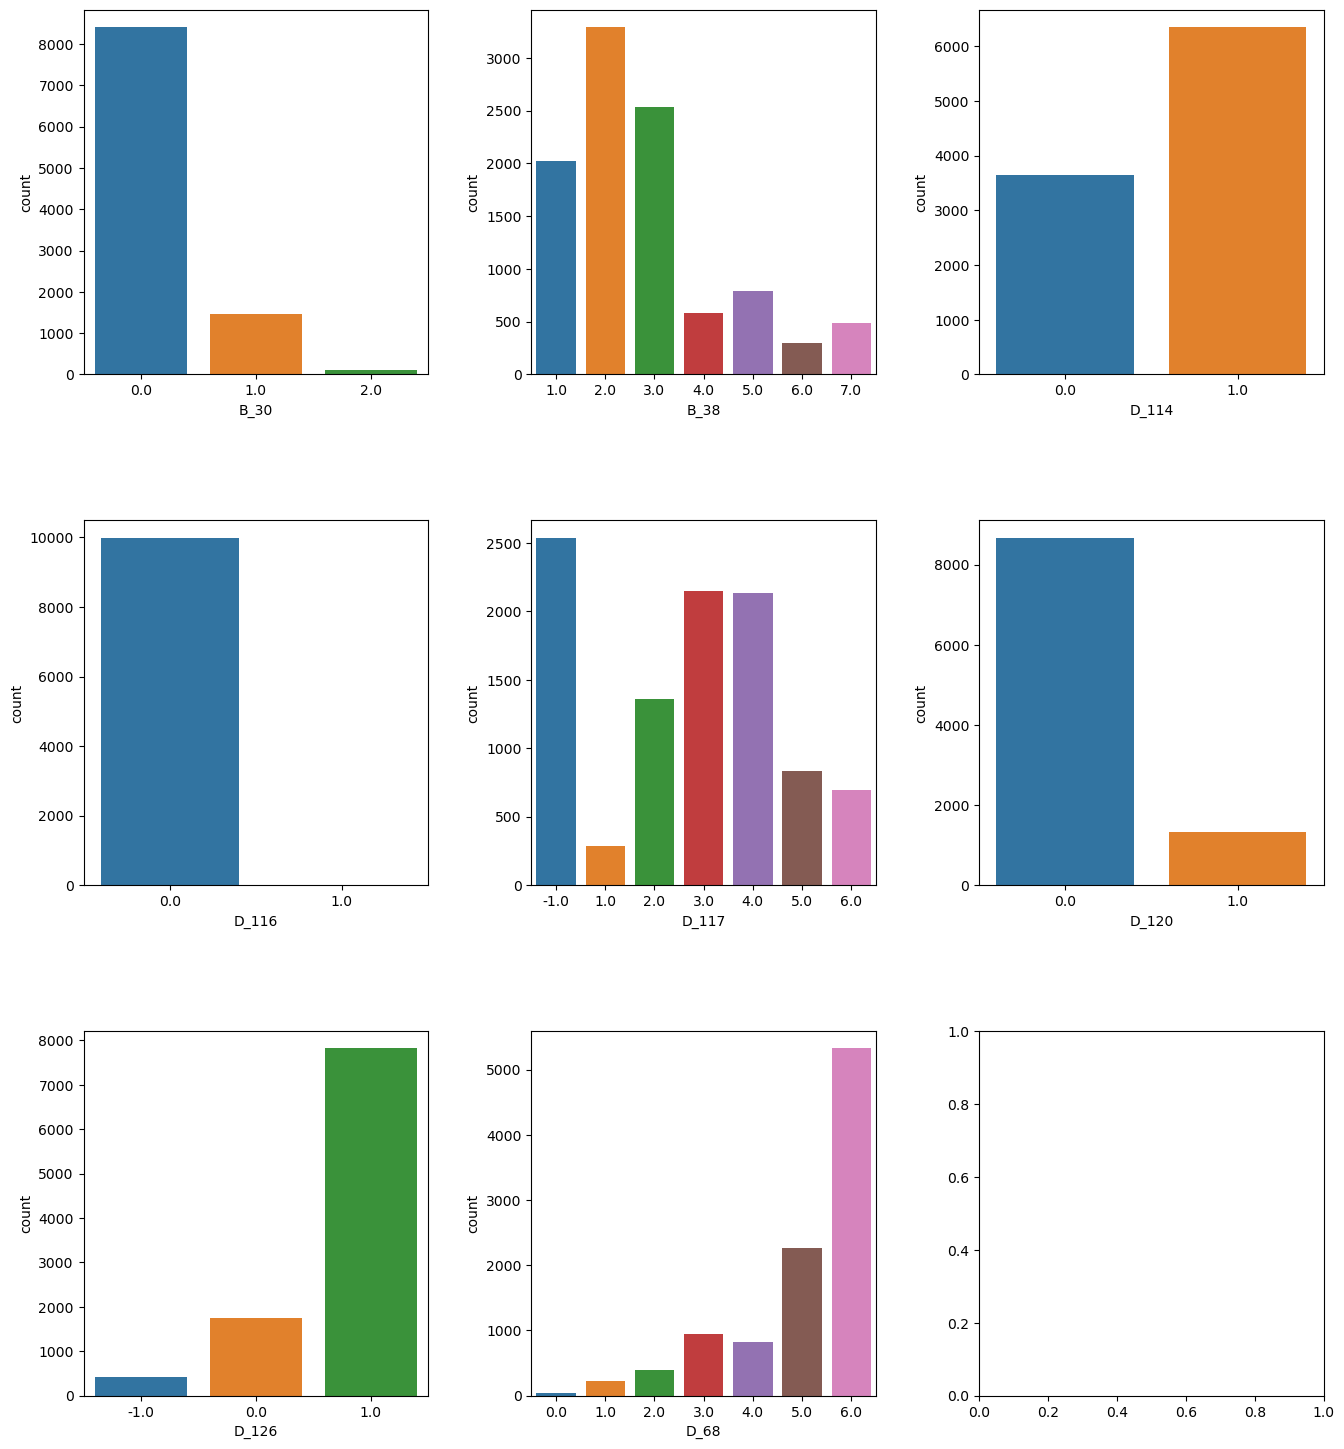

**Distribution of Select Continuous Variables**
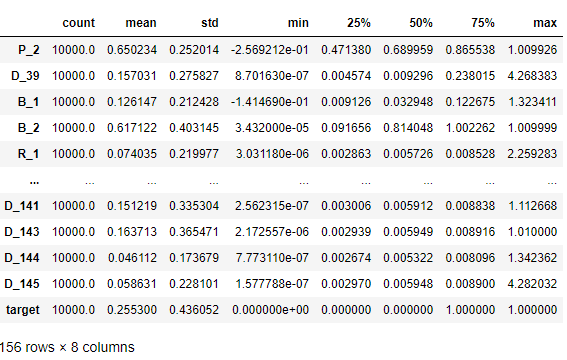

**Relationship between Categorical Variables and Response**
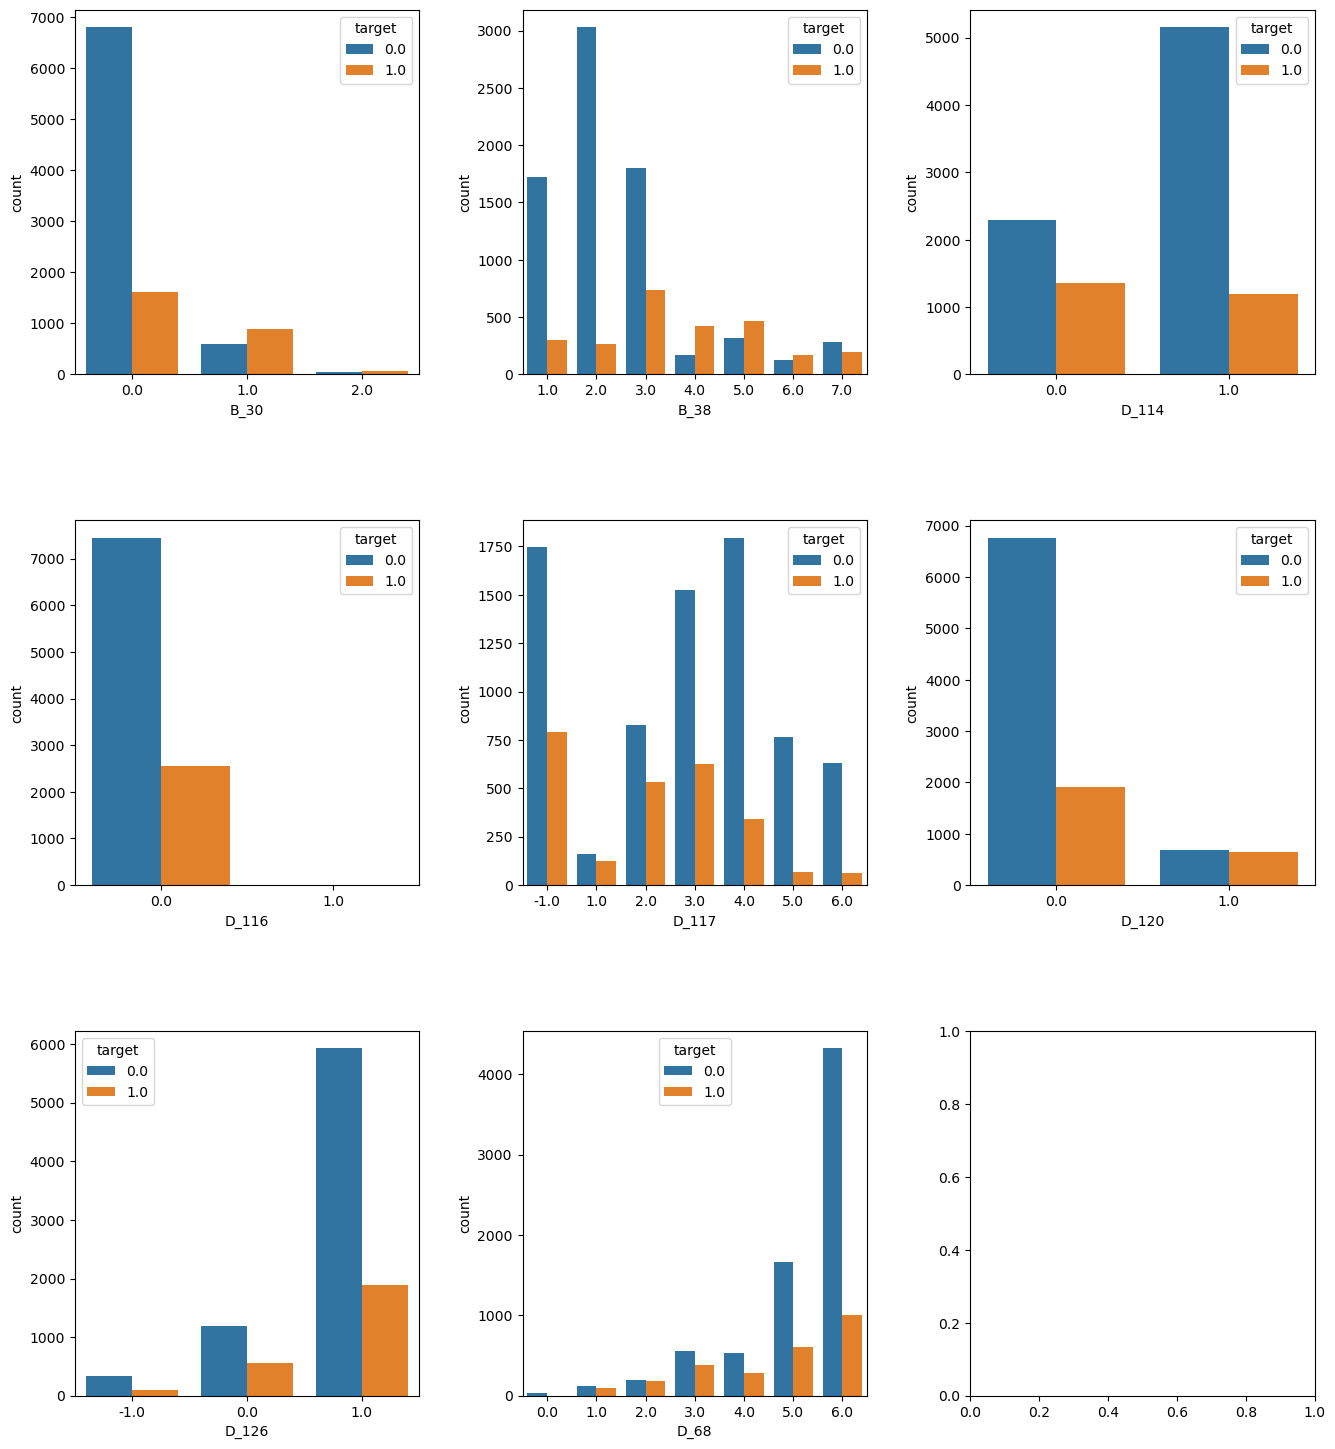